In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./dataset/kc_house_data.csv')
# Read dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Performing Exploratory Data Analysis

We have 21613 entries in the dataset and all value are non-null which means there are no missing values.

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


An overview of the dataset to be able to infer what features are high, low, mean, their influence on the price of the houses

We performed exploratory data analysis to understand our dataset, make sense of it, find interesting patterns and correlations.
We will try to detect missing values in the dataset, all numerical variables and their distribution, categorical variables, outliers, and the relationship between an independent and dependent characteristic in dataset.


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [6]:
vars = data.columns[0:]
vars

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Visualizations to understand our data better and identifying what variables impacts housing price and how much the impact is.

In [7]:
house_features = data.drop(['id', 'date'], axis=1)
correlation = house_features.corr()
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


# Feature Engineering

We can visualize the data and better understand the relationships between different factors after cleaning the data.
You may use scatterplots, histograms, and boxplots, among other visualizations, to understand more about your dataset.


<AxesSubplot:>

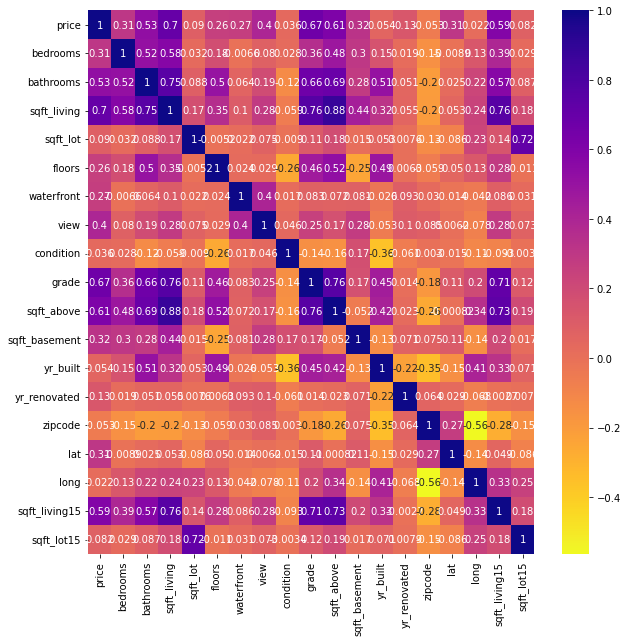

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap='plasma_r', annot=True)

From the above heatmap, we can visualise the correlation between features that impacts prices the most, we can outline `sqft_lot` as the most impacting price followed by `grade`, `sqft_above`, `sqft_living15`.

We can explore further with Spearman correlation and plotting charts individual for the features.


It becomes clear using Spearman correlation that `grade`, `sqft_living`, `sqft_living15`, `sqft_above`, `bathrooms` greatly influences price of houses.

<AxesSubplot:>

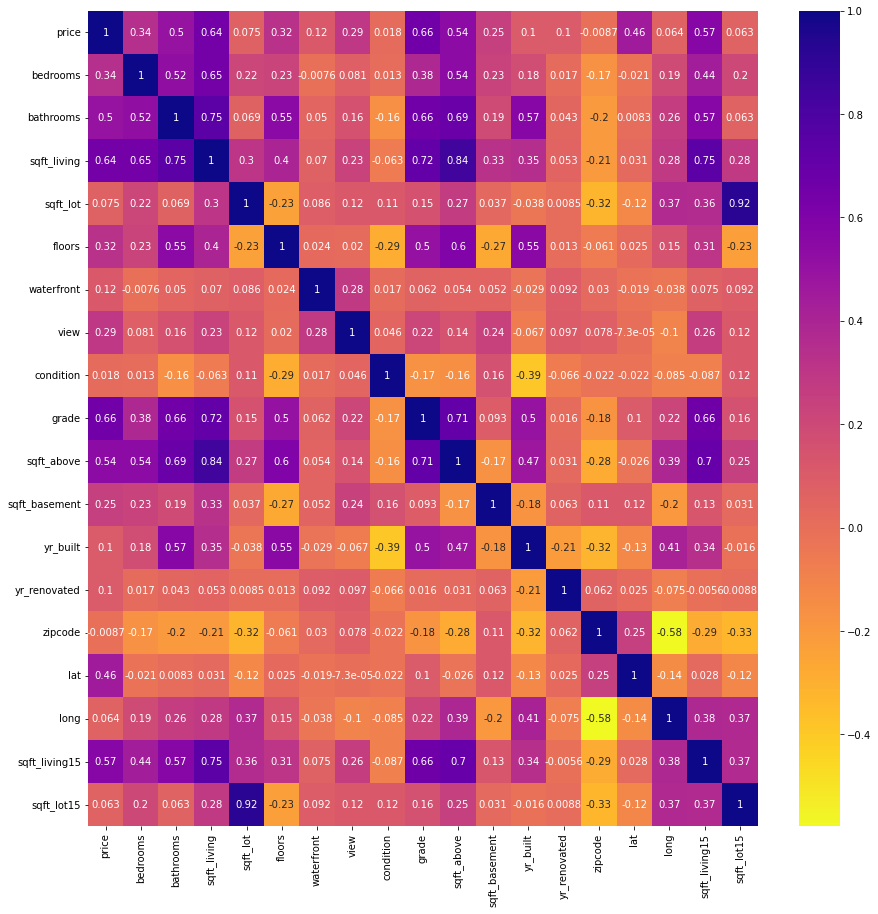

In [9]:
spearmanCorr = house_features.corr('spearman')
plt.figure(figsize=(15, 15))
sns.heatmap(spearmanCorr, xticklabels=spearmanCorr.columns, yticklabels=spearmanCorr.columns, cmap='plasma_r', annot=True)

A heatmap showing correlation between features and price.
From the above heatmap, we can visualise the correlation between features that impacts prices the most, we can outline `sqft_lot` as the most impacting price followed by `grade`, `sqft_above`, `sqft_living15`.

We can explore further with Spearman correlation and plotting charts individual for the features.

It becomes clear using Spearman correlation that `grade`, `sqft_living`, `sqft_living15`, `sqft_above`, `bathrooms` greatly influences price of houses.

Text(0.5, 1.0, 'Correlation between Price and Bedrooms')

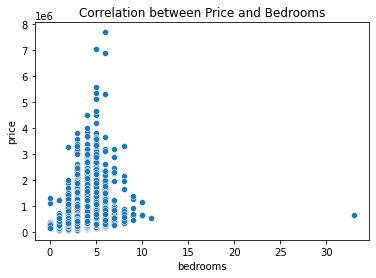

In [10]:
sns.scatterplot(data=data, x='bedrooms', y='price')
plt.title('Correlation between Price and Bedrooms')

Text(0.5, 1.0, 'Correlation between Price and Bathrooms')

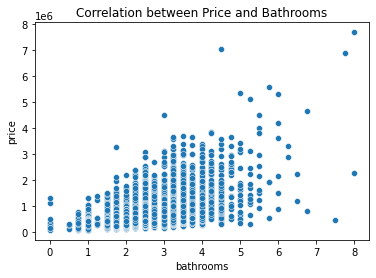

In [11]:
sns.scatterplot(data=data, x='bathrooms', y='price')
plt.title('Correlation between Price and Bathrooms')


Text(0.5, 1.0, 'Correlation between Price and Floor')

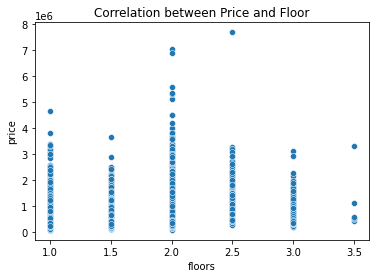

In [12]:
sns.scatterplot(data=data, x='floors', y='price')
plt.title('Correlation between Price and Floor')


Text(0.5, 1.0, 'Correlation between Price and Grade')

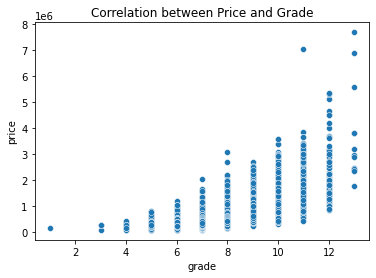

In [13]:
sns.scatterplot(data=data, x='grade', y='price')
plt.title('Correlation between Price and Grade')


Text(0.5, 1.0, 'Correlation between Price and Condition')

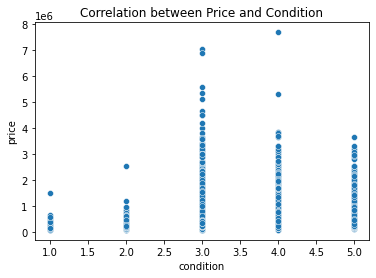

In [14]:
sns.scatterplot(data=data, x='condition', y='price')
plt.title('Correlation between Price and Condition')


Text(0.5, 1.0, 'Correlation between Price and sqft_living')

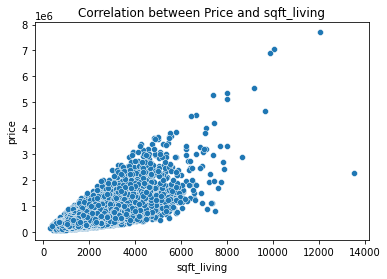

In [15]:
sns.scatterplot(data=data, x='sqft_living', y='price')
plt.title('Correlation between Price and sqft_living')


Text(0.5, 1.0, 'Correlation between Price and lat')

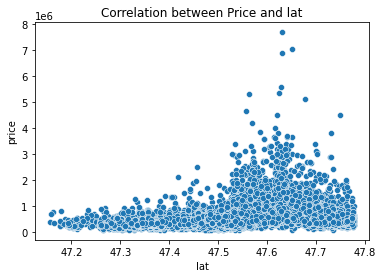

In [16]:
sns.scatterplot(data=data, x='lat', y='price')
plt.title('Correlation between Price and lat')


Text(0.5, 1.0, 'Correlation between Price and long')

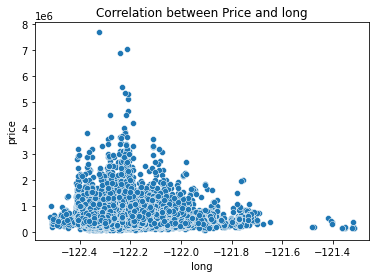

In [17]:
sns.scatterplot(data=data, x='long', y='price')
plt.title('Correlation between Price and long')


Text(0.5, 1.0, 'Correlation between Price and zipcode')

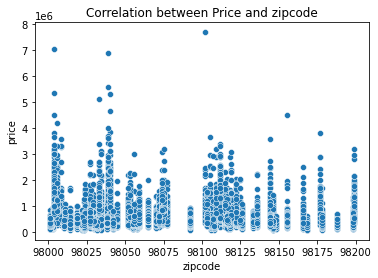

In [18]:
sns.scatterplot(data=data, x='zipcode', y='price')
plt.title('Correlation between Price and zipcode')


# Find the most common house type.
Since there's no type of house in the dataset, we can construct house type with respect to `bedrooms`, `bathrooms`, `sqft_living`, and `grade`

Text(0.5, 0, 'Bedrooms')

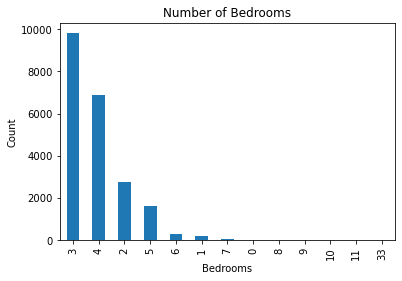

In [19]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.ylabel('Count')
plt.xlabel('Bedrooms')

<AxesSubplot:title={'center':'Number of Bathrooms'}, xlabel='Bathrooms', ylabel='Count'>

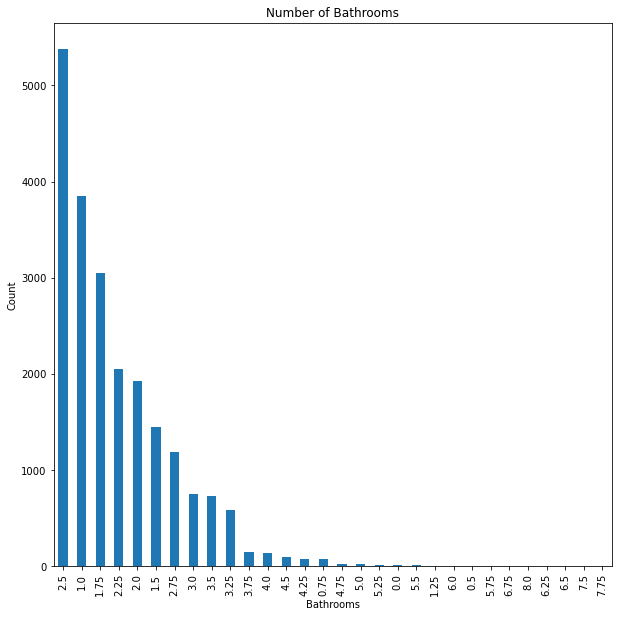

In [20]:
plt.figure(figsize=(10, 10))
plt.title('Number of Bathrooms')
plt.ylabel('Count')
plt.xlabel('Bathrooms')
data['bathrooms'].value_counts().plot(kind='bar')

Text(0.5, 0, 'Grades')

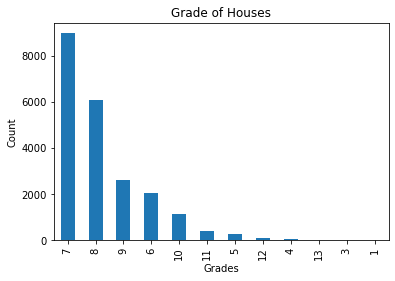

In [21]:
data['grade'].value_counts().plot(kind='bar')
plt.title('Grade of Houses')
plt.ylabel('Count')
plt.xlabel('Grades')

##### From the above set of Charts, we can conclude that house type by `Bedroom` number is the most popular house type with having `3 bedrooms` as the highest kind of house and most common.

### Does the region in which is the house in effect its price? If so, what are the most common regions

<Figure size 576x576 with 0 Axes>

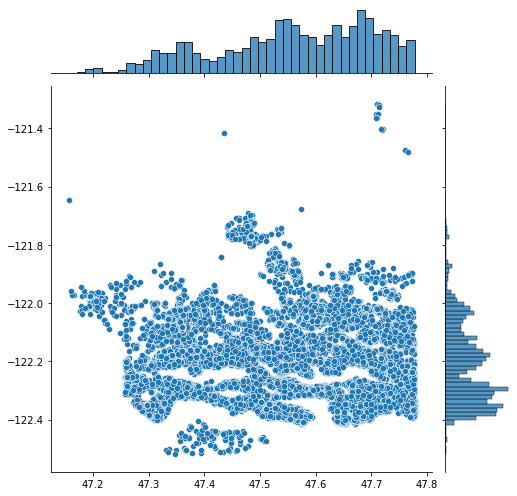

In [22]:
plt.figure(figsize=(8,8))
sns.jointplot(x=data.lat.values, y=data.long.values, height=7)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize=12)
plt.show()


### Most Expensive House Type


In [23]:
mostExpensive = data.groupby('price')
mostExp = mostExpensive.get_group(7.700000e+06) 
# The value was gotten by running data.describe() as it provides the max price.

mostExp

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


<AxesSubplot:>

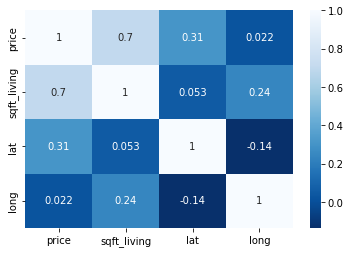

In [24]:
corrBetween = data[['price', 'sqft_living', 'lat', 'long']]

sns.heatmap(corrBetween.corr(), xticklabels=corrBetween.corr().columns, yticklabels=corrBetween.corr().columns, cmap='Blues_r', annot=True)

# Begin our model Building.

In [25]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential

X = data.drop(['id', 'price', 'date'], axis=1)
y = data['price']

# Split data into test and train sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Split the train and validation set.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42)

# Scaler to make features close to normal distribution.
# Scale X_train, X_test, X_val.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)


(15129, 18) (6484, 18) (15129,) (6484,)


# Simple Linear Regression Model 
Build our Initial price predictor model

Model building: 

Involved creating a `sequential model` with a `dense input layer` with `input shape of 18` in this case and `relu` as the `activation function`, consists of `one hidden layer` and `output layer`. The rationale for choosing Sequential model is that out network consists of `linear stack of layer`, we used relu as the activation function because it has the ability to `not activate all neurons at the same time` which creates a `sparse and efficient network`, also it is widely used due to the advantage of being nonlinear. The `Dense units are randomized` as we can’t tell for sure best way to determine them rather than trying different values and measuring the result.


In [26]:
# Build our price predictor model
model = Sequential()
model.add(Dense(24, input_shape=(18,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                456       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                800       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,289
Trainable params: 1,289
Non-trainable params: 0
_________________________________________________________________


2022-03-31 13:19:05.028188: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model compilation

Opted to use `RMSProp` as our `optimizer` here as opposed to the more popular `adam`, because `RMSProp` is more suitable to `sparse problem` than adam. We have a sparse problem hence why we are using Sequential model constructor.

In [27]:

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='mse', optimizer=opt, metrics=['mae'])

Model Fit Training

Using a `batch size` of 20 to make the training more `effective and repetitive`, using low batch sizes increases the time of training but can have a `positive effect` on `training accuracy`, however we need to be careful of `over-fitting`.

In [28]:
history = model.fit(
  X_train, y_train, validation_data=(X_val, y_val),
  batch_size=20, epochs=10, validation_split=0.1, verbose=1
)

2022-03-31 13:19:05.195209: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/10
511/511 [==============================] - 1s 1ms/step - loss: 401589602816.0000 - mae: 517685.9260 - val_loss: 177496866816.0000 - val_mae: 299971.5938
Epoch 2/10
511/511 [==============================] - 0s 578us/step - loss: 142901071392.0000 - mae: 227566.6443 - val_loss: 70319439872.0000 - val_mae: 181162.4531
Epoch 3/10
511/511 [==============================] - 0s 588us/step - loss: 81292580632.0000 - mae: 183930.5766 - val_loss: 64070533120.0000 - val_mae: 174985.6094
Epoch 4/10
511/511 [==============================] - 0s 617us/step - loss: 73161537064.0000 - mae: 172665.1707 - val_loss: 57180889088.0000 - val_mae: 163718.5625
Epoch 5/10
511/511 [==============================] - 0s 628us/step - loss: 82701588736.0000 - mae: 172486.1911 - val_loss: 50430197760.0000 - val_mae: 149365.2812
Epoch 6/10
511/511 [==============================] - 0s 689us/step - loss: 62151463264.0000 - mae: 157607.6696 - val_loss: 44700897280.0000 - val_mae: 140655.4688
Epoch 7/10
511/

In [29]:
# Function to plot model accuracy vs epochs and plot loss vs epochs.
def plot_model_accuracy_graph(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  accuracy = history_dict['mae']
  val_accuracy = history_dict['val_mae']
  
  epochs = range(1, len(loss_values) + 1)
  fig, ax = plt.subplots(1, 2, figsize=(14, 6))
  #
  # Plot the model accuracy (MAE) vs Epochs
  #
  ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
  ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  ax[0].set_title('Training & Validation Accuracy', fontsize=16)
  ax[0].set_xlabel('Epochs', fontsize=16)
  ax[0].set_ylabel('Accuracy', fontsize=16)
  ax[0].legend()
  #
  # Plot the loss vs Epochs
  #
  ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
  ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
  ax[1].set_title('Training & Validation Loss', fontsize=16)
  ax[1].set_xlabel('Epochs', fontsize=16)
  ax[1].set_ylabel('Loss', fontsize=16)
  ax[1].legend()

# Evaluate the Model

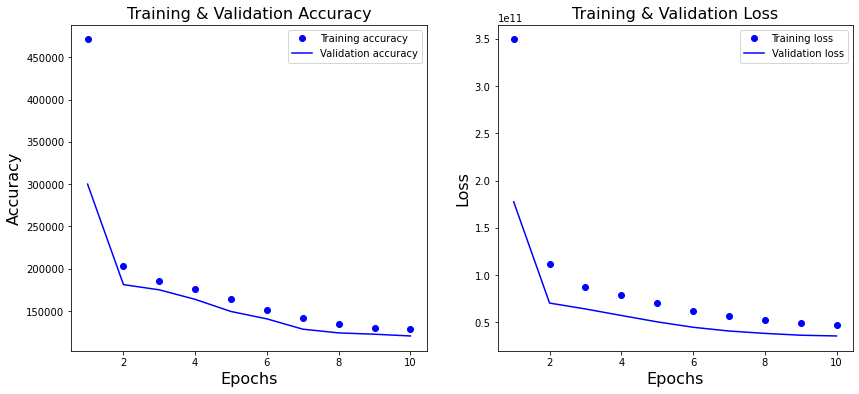

In [30]:
plot_model_accuracy_graph(history)

<AxesSubplot:>

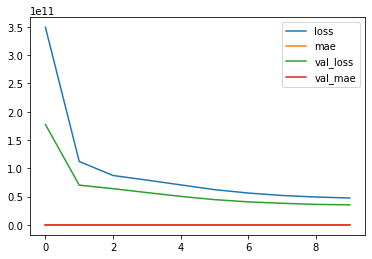

In [31]:
loss = pd.DataFrame(history.history)
loss.plot()

In [32]:
from sklearn.metrics import mean_absolute_error, r2_score
def model_r2_score(model):
  test_pred = model.predict(X_test)
  fig, ax = plt.subplots(figsize=(10,6))
  ax.scatter(y_test, test_pred)
  ax.plot(y_test,y_test,'r')
  mae = mean_absolute_error(y_test, test_pred)
  r2 = r2_score(y_test,test_pred)

  return {
    'mean_absolute_error': mae,
    'regression_score_function_r2': r2,
  }


### Mean Absolute Error
The  is the average of the absolute differences between prediction and actual observation over the test sample, where all individual deviations are given equal weight.
This demonstrates that our guess is around `£ 131085` off from the actual price. 

### Regression score function - coefficient of determination
Through the proportion of explained variance, it provides an indication of model goodness of fit and, as a result, a measure of how well the model is likely to predict unseen data.
Highest possible score is `1.0`


Our model has an R2 score of `0.64` fit accurracy.


{'mean_absolute_error': 130938.21045362412,
 'regression_score_function_r2': 0.6322685898999647}

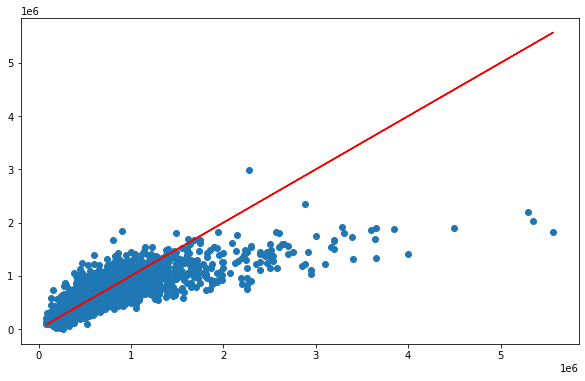

In [33]:
model_r2_score(model)

We're going to tweak the hyperparameter of our model and document how they behave compared to our first trial and better the accuracy.

##### - Could we have added more layers?
##### - The layer units should be more or less?
##### - Maybe the Epoch is too low?
##### - Will inceasing or decreasing the batch size help?

In [34]:
model_1 = Sequential()
model_1.add(Dense(24, input_shape=(18,), activation='relu'))
model_1.add(Dense(80, activation='relu'))
model_1.add(Dense(45, activation='relu'))
model_1.add(Dense(1))
model_1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                456       
_________________________________________________________________
dense_4 (Dense)              (None, 80)                2000      
_________________________________________________________________
dense_5 (Dense)              (None, 45)                3645      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 46        
Total params: 6,147
Trainable params: 6,147
Non-trainable params: 0
_________________________________________________________________


In [35]:

opt_1 = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=opt_1, metrics=['mae'])

In [36]:
history_1 = model_1.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=20, epochs=10, validation_split=0.1, verbose=1)


Epoch 1/10
511/511 [==============================] - 1s 777us/step - loss: 218201865584.0000 - mae: 322581.1557 - val_loss: 47685177344.0000 - val_mae: 145517.2344
Epoch 2/10
511/511 [==============================] - 0s 623us/step - loss: 62349730440.0000 - mae: 148261.9292 - val_loss: 34333667328.0000 - val_mae: 118785.8203
Epoch 3/10
511/511 [==============================] - 0s 651us/step - loss: 39899182872.0000 - mae: 125812.6811 - val_loss: 31438000128.0000 - val_mae: 119587.2031
Epoch 4/10
511/511 [==============================] - 0s 699us/step - loss: 37307464584.0000 - mae: 125684.3016 - val_loss: 30417862656.0000 - val_mae: 120433.1172
Epoch 5/10
511/511 [==============================] - 0s 661us/step - loss: 37863128308.0000 - mae: 126475.3968 - val_loss: 29035552768.0000 - val_mae: 114116.5391
Epoch 6/10
511/511 [==============================] - 0s 684us/step - loss: 37925156112.0000 - mae: 120546.0827 - val_loss: 30009196544.0000 - val_mae: 116147.8594
Epoch 7/10
511/

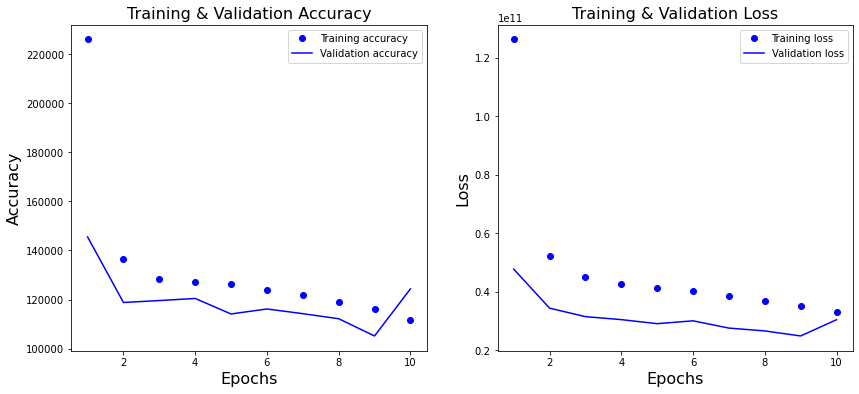

In [37]:
plot_model_accuracy_graph(history_1)


{'mean_absolute_error': 133237.08864247572,
 'regression_score_function_r2': 0.7219474421932112}

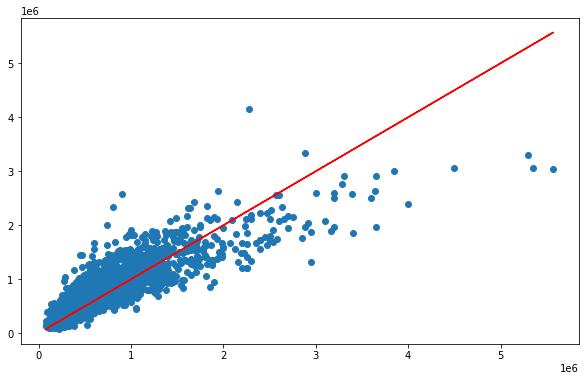

In [38]:
model_r2_score(model_1)

<AxesSubplot:>

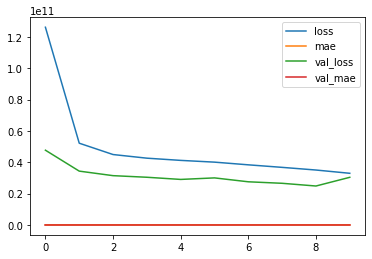

In [39]:
loss_1 = pd.DataFrame(history_1.history)
loss_1.plot()

This came out much better than the initial model with an R2 of `76`, this was achieved by increasing the `hidden layer` from `3` to `4` we will keep tweaking this `model_1` to achieve higher model score.

In [40]:
model_2 = Sequential()
model_2.add(Dense(24, input_shape=(18,), activation='relu'))
model_2.add(Dense(80, activation='relu'))
model_2.add(Dense(65, activation='relu'))
model_2.add(Dense(45, activation='relu'))
model_2.add(Dense(1))
model_2.summary()
model_2.compile(loss='mse', optimizer=opt_1, metrics=['mae'])
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=20, epochs=10, validation_split=0.1, verbose=1)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 24)                456       
_________________________________________________________________
dense_8 (Dense)              (None, 80)                2000      
_________________________________________________________________
dense_9 (Dense)              (None, 65)                5265      
_________________________________________________________________
dense_10 (Dense)             (None, 45)                2970      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 46        
Total params: 10,737
Trainable params: 10,737
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
511/511 [==============================] - 1s 932us/step - loss: 138165497008.0000 - mae: 243884.4212 - a

{'mean_absolute_error': 110868.3698599437,
 'regression_score_function_r2': 0.7677851463635509}

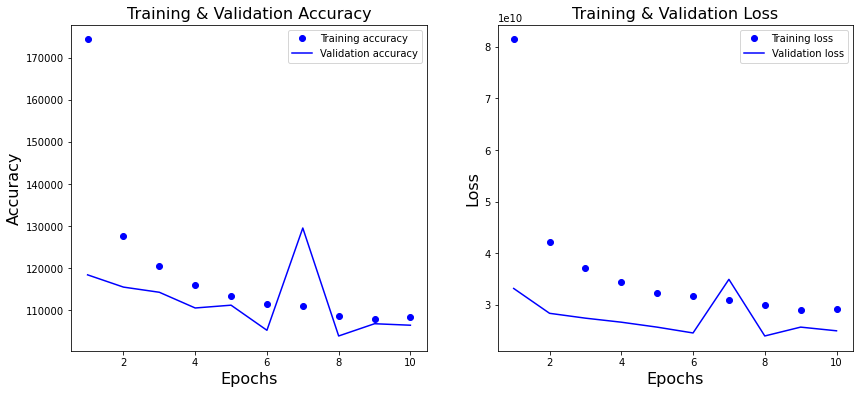

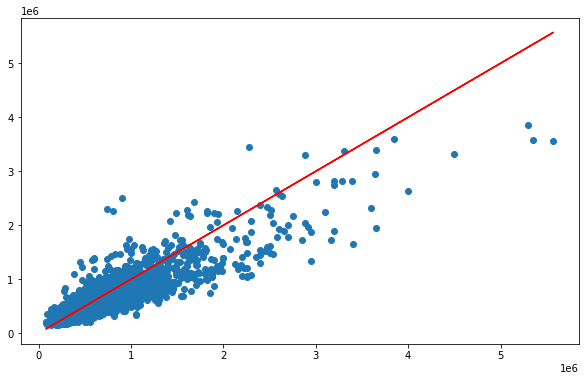

In [41]:
plot_model_accuracy_graph(history_2)
model_r2_score(model_2)


Adding one more layer increase the accuracy by `0.3`, which is significant but what if we adjust the units of each layers?

In [42]:
model_2 = Sequential()
model_2.add(Dense(24, input_shape=(18,), activation='relu'))
model_2.add(Dense(80, activation='relu'))
model_2.add(Dense(65, activation='relu'))
model_2.add(Dense(75, activation='relu'))
model_2.add(Dense(45, activation='relu'))
model_2.add(Dense(1))
model_2.summary()
model_2.compile(loss='mse', optimizer=opt_1, metrics=['mae'])
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=10, epochs=60, validation_split=0.1, verbose=1)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 24)                456       
_________________________________________________________________
dense_13 (Dense)             (None, 80)                2000      
_________________________________________________________________
dense_14 (Dense)             (None, 65)                5265      
_________________________________________________________________
dense_15 (Dense)             (None, 75)                4950      
_________________________________________________________________
dense_16 (Dense)             (None, 45)                3420      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 46        
Total params: 16,137
Trainable params: 16,137
Non-trainable params: 0
__________________________________________________

{'mean_absolute_error': 88376.86382345002,
 'regression_score_function_r2': 0.835570310070964}

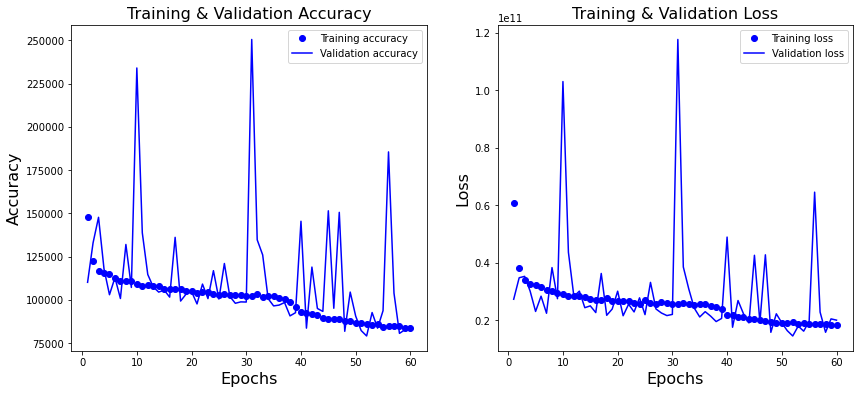

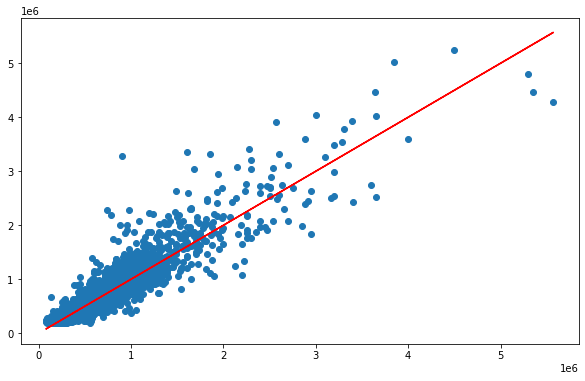

In [43]:
plot_model_accuracy_graph(history_2)
model_r2_score(model_2)

Increasing the `epoch` and decreasing the `batch size` has a significant impact on how the model performs, however; we should be careful of `over-fitting` as the model batch will enable `re-inforcement learning`.

In [52]:
model_2 = Sequential()
model_2.add(Dense(24, input_shape=(18,), activation='relu'))
model_2.add(Dense(36, activation='relu'))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(1))
model_2.summary()
model_2.compile(loss='mse', optimizer=opt_1, metrics=['mae'])
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=60, epochs=350, validation_split=0.1, verbose=1)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 24)                456       
_________________________________________________________________
dense_43 (Dense)             (None, 36)                900       
_________________________________________________________________
dense_44 (Dense)             (None, 50)                1850      
_________________________________________________________________
dense_45 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_46 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 51        
Total params: 8,357
Trainable params: 8,357
Non-trainable params: 0
____________________________________________________

{'mean_absolute_error': 75909.88669465222,
 'regression_score_function_r2': 0.8756713094798392}

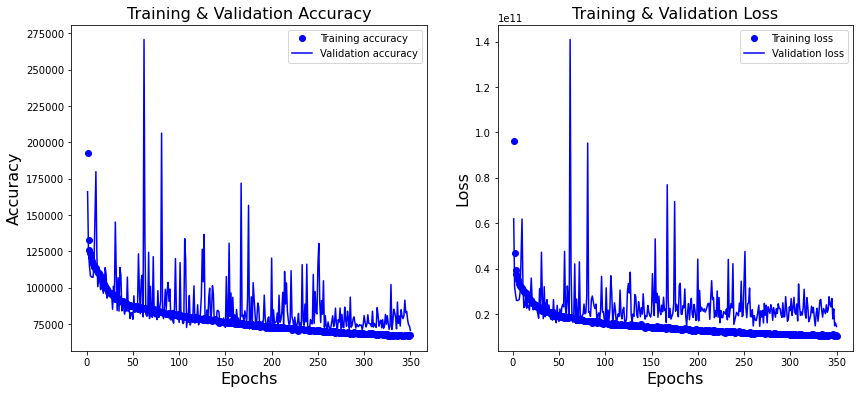

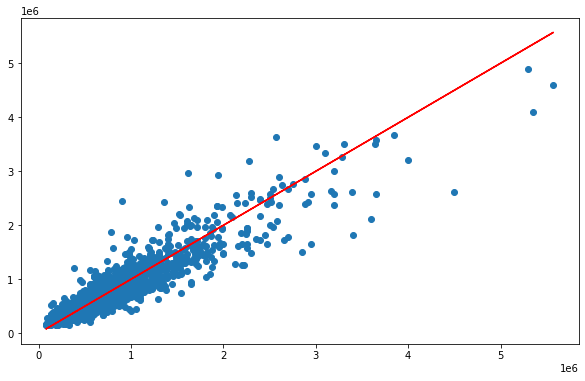

In [53]:
plot_model_accuracy_graph(history_2)
model_r2_score(model_2)